# Stock Analysis OOP

### A stock analysis class to analyse different metrics of a stock:
* Get Stock data from yfinance
* Log returns of stocks 
* Plot Prices
* Plot log returns 
* Set ticker symbol
* Calculate Mean Returns 
* Measure stick Volatility or Risk
* Calculate Annualized performance of a stock

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import certifi
import json


In [2]:
class StockAnalysis(): #parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns
        
    def __repr__(self):
        return f"Stock(ticker:{self._ticker}, start: {self.start}, end: {self.end})"
        
        
    def get_data(self):
        """
        get stock data from yahoo finance
        
        """
        df = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        df.rename(columns = {"Close" : "price"}, inplace = True)
        self.data = df
        return df
    
    def log_returns(self):
        """
        log returns, 
        returns the the log returns of stocks
        
        """
        
        #self.data = self.get_data()
        self.data["log_returns"] = (np.log(self.data.price/self.data.price.shift(1)))
        return self.data.dropna()
       
    
    def plot_prices(self):
        self.data.price.plot(figsize=(12,7))
        plt.title(f"{self._ticker} price chart", fontsize = 15)
        
    def plot_log_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12,7))
            plt.title(f"{self._ticker} log return chart", fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12,7), bins = int(np.sqrt(len(self.data))))
            plt.title(f"{self._ticker} log return chart", fontsize = 15)
            
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns
            
    def mean_return(self, freq = None):
        """
        expected returns, 
        returns the the expected value, or mean, of all the likely returns of investments comprising a portfolio.
        
        """
        
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
        
    def std_return(self, freq = None):
                
        """
        volatility/risk,
        returns the measure of volatility or risk.
        """
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() *252, 3)
        risk = round(self.data.log_returns.std() *np.sqrt(252), 3)
        print(f"Return {mean_return}  | Risk: {risk}")
        
    
        
            
        

In [3]:
class StockMetrics(StockAnalysis): #child
    
    def __init__(self, ticker, start, end, limit):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.api_key = "0c8485686951686621a686be9a4dfc95"
        self.limit = limit
    
    def __repr__(self):
        return f"StockMetrics(ticker:{self._ticker}, start: {self.start}, end: {self.end})"
    
    def company_metrics(self):
        if self.limit is None:
            URL =f"https://financialmodelingprep.com/api/v3/key-metrics/{self._ticker}?limit=40&apikey={self.api_key}"
            df = pd.read_json(URL)
            return df
        else: 
            URL =f"https://financialmodelingprep.com/api/v3/key-metrics/{self._ticker}?limit={limit}&apikey={api_key}"
            df = pd.read_json(URL)
            return df
            
            

In [4]:
stt = StockAnalysis("WMT", "2019-01-01", "2020-12-30")

[*********************100%***********************]  1 of 1 completed


In [5]:
print(stt)

Stock(ticker:WMT, start: 2019-01-01, end: 2020-12-30)


In [6]:
st= StockMetrics("WMT", "2019-01-01", "2020-12-30", "40" )

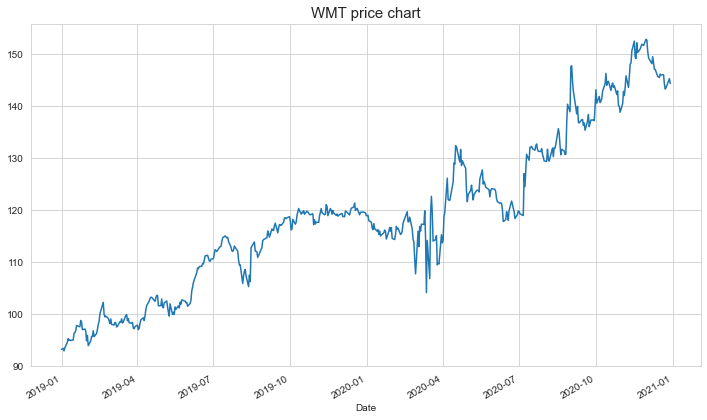

In [7]:
stt.plot_prices()

In [11]:
stock = StockAnalysis("TSLA", "2019-01-01", "2022-01-21")

[*********************100%***********************]  1 of 1 completed


In [12]:
st

StockMetrics(ticker:WMT, start: 2019-01-01, end: 2020-12-30)

In [13]:
stock.log_returns()

,price,log_returns
Date,,
2019-01-02,62.023998,-0.070582
2019-01-03,60.071999,-0.031978
2019-01-04,63.537998,0.056094
2019-01-07,66.991997,0.052935
2019-01-08,67.070000,0.001164
...,...,...
2022-01-13,1031.560059,-0.069876
2022-01-14,1049.609985,0.017346
2022-01-18,1030.510010,-0.018365


In [31]:
#stock.set_ticker("WMT") 

In [14]:
stock.mean_return(freq = "y")


0.6764786412391077

In [15]:
stock.std_return("y")

0.9891325308088361

In [16]:
stock.annualized_perf()

Return 0.886  | Risk: 0.672


In [17]:
ss = stock.log_returns()
ss

,price,log_returns
Date,,
2019-01-02,62.023998,-0.070582
2019-01-03,60.071999,-0.031978
2019-01-04,63.537998,0.056094
2019-01-07,66.991997,0.052935
2019-01-08,67.070000,0.001164
...,...,...
2022-01-13,1031.560059,-0.069876
2022-01-14,1049.609985,0.017346
2022-01-18,1030.510010,-0.018365


In [18]:
resampled_price = ss.price.resample("w").last
#resampled_returns = np.log(resampled_price / resampled_price.shift(1))
resampled_price

<bound method f of <pandas.core.resample.DatetimeIndexResampler object at 0x000001BF6ECCCB80>>

In [19]:
resampled_price = ss.price.resample('w').last()
resampled_price

Date
2019-01-06      63.537998
2019-01-13      69.452003
2019-01-20      60.452000
2019-01-27      59.408001
2019-02-03      62.442001
                 ...     
2021-12-26    1067.000000
2022-01-02    1056.780029
2022-01-09    1026.959961
2022-01-16    1049.609985
2022-01-23     996.270020
Freq: W-SUN, Name: price, Length: 160, dtype: float64

In [20]:
resampled_returns = np.log(resampled_price / resampled_price.shift(1))
resampled_returns

Date
2019-01-06         NaN
2019-01-13    0.088998
2019-01-20   -0.138786
2019-01-27   -0.017421
2019-02-03    0.049809
                ...   
2021-12-26    0.134662
2022-01-02   -0.009624
2022-01-09   -0.028624
2022-01-16    0.021816
2022-01-23   -0.052156
Freq: W-SUN, Name: price, Length: 160, dtype: float64

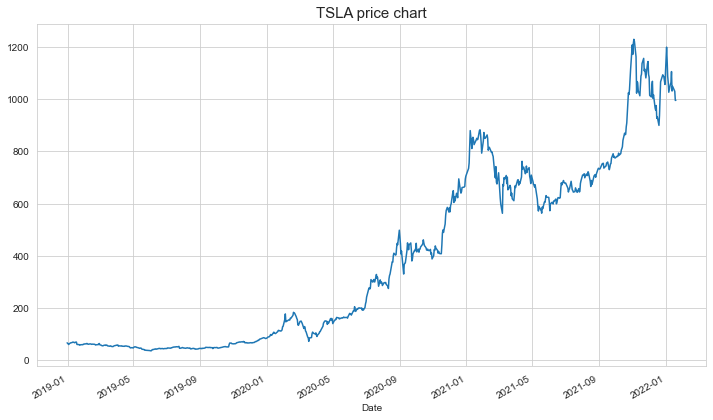

In [22]:
stock.plot_prices()

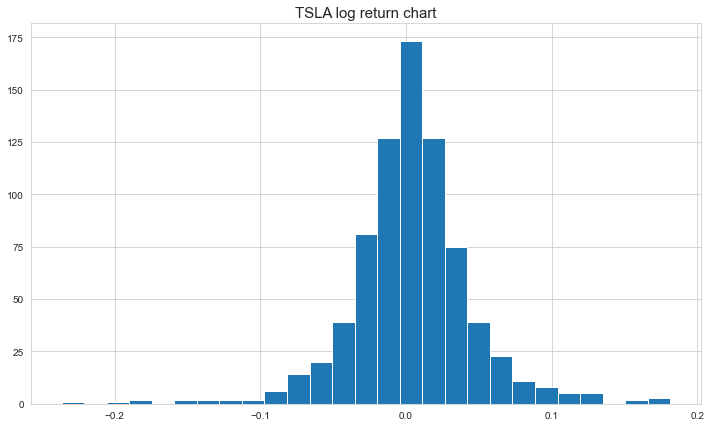

In [23]:
stock.plot_log_returns("hist")

In [28]:
stock._ticker

'TSLA'

In [25]:
sd = stock.get_data()
sd

[*********************100%***********************]  1 of 1 completed


,price
Date,
2018-12-31,66.559998
2019-01-02,62.023998
2019-01-03,60.071999
2019-01-04,63.537998
2019-01-07,66.991997
...,...
2022-01-13,1031.560059
2022-01-14,1049.609985
2022-01-18,1030.510010


In [26]:
d = stock.log_returns()
d

,price,log_returns
Date,,
2019-01-02,62.023998,-0.070582
2019-01-03,60.071999,-0.031978
2019-01-04,63.537998,0.056094
2019-01-07,66.991997,0.052935
2019-01-08,67.070000,0.001164
...,...,...
2022-01-13,1031.560059,-0.069876
2022-01-14,1049.609985,0.017346
2022-01-18,1030.510010,-0.018365


<AxesSubplot:xlabel='Date'>

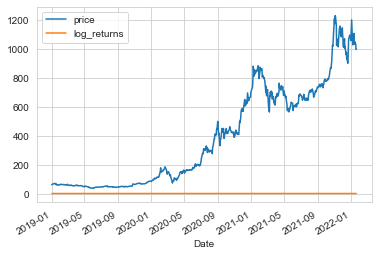

In [27]:
d.plot()